In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [103]:
freq = "2H"

min    max  mean  jitter  n_threshold      n  \
day    hour minute                                                  
Monday 12   0       17.9  377.2  34.2    30.1          212   4800   
       14   0       19.0  373.7  35.3    30.8         1683  38800   
       16   0       19.8  353.9  35.6    29.0         1588  36500   
       18   0       21.1  329.1  34.5    25.0          197   5000   
       20   0       20.1  345.6  36.0    27.6         1017  23300   
       22   0       22.2  371.8  37.8    29.0         1517  33700   

                    pct_above_threshold  
day    hour minute                       
Monday 12   0                      4.42  
       14   0                      4.34  
       16   0                      4.35  
       18   0                      3.94  
       20   0                      4.36  
       22   0                      4.50

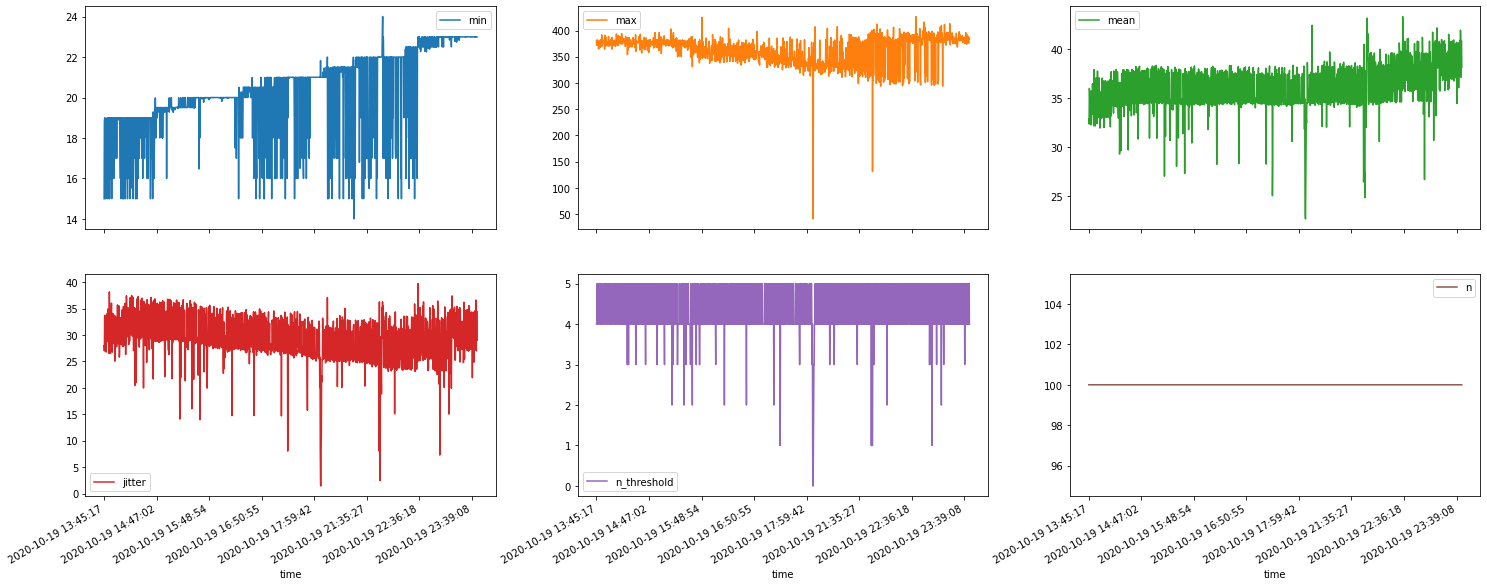

In [105]:
ping_data = pd.read_csv(
    "league_ping_data.csv",
    header=None,
    names=["time", "min", "max", "mean", "jitter", "n_threshold", "n"],
    index_col="time",
)
ping_data.plot(subplots=True, figsize=(25, 10), layout=(2, 3))
summary_df = ping_data.groupby(
    by=[
        pd.DatetimeIndex(ping_data.index).floor(freq).day_name().rename("day"),
        pd.DatetimeIndex(ping_data.index).floor(freq).hour.rename("hour"),
        pd.DatetimeIndex(ping_data.index).floor(freq).minute.rename("minute"),
    ]
).agg(
    {
        "min": "mean",
        "max": "mean",
        "mean": "mean",
        "jitter": "mean",
        "n_threshold": "sum",
        "n": "sum",
    }
)
summary_df["pct_above_threshold"] = 100 * summary_df["n_threshold"] / summary_df["n"]
summary_df.round({"min": 1, "max": 1, "mean": 1, "jitter": 1, "pct_above_threshold": 2})